In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings

In [2]:
### 01 - Problem (case study)

In [3]:
### Read the .csv file.

In [4]:
data=pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
### 03 - Cleaning/Wrangling/EDA

In [6]:
len(data)

9134

In [7]:
data.Customer.nunique() 

9134

In [8]:
data.State.nunique() 

5

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [10]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
data.columns = [column.lower() for column in data.columns] 
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
data.columns =[col_name.lower().replace(' ', '_') for col_name in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [13]:

data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
data.response.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
data.state.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [16]:
data.coverage.unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [17]:
data.education.unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [18]:
data.employmentstatus.unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [19]:
data.gender.unique()

array(['F', 'M'], dtype=object)

In [20]:
data.location_code.unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [21]:
data.policy_type.unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [22]:
data.policy.unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [23]:
data.renew_offer_type.unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [24]:
data.sales_channel.unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [25]:
data.number_of_policies.unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5], dtype=int64)

In [26]:
data.months_since_policy_inception.unique()

array([ 5, 42, 38, 65, 44, 94, 13, 68,  3,  7, 87, 82, 25, 10, 50, 59,  1,
       21, 49, 91, 47, 64, 54,  6, 14, 56, 17, 40, 62, 86, 79, 15, 32, 28,
       16,  4, 57, 77, 95, 26, 53, 12, 98, 36, 71, 60, 20,  0, 27, 48, 33,
       83, 30, 69, 90, 81, 84, 88, 18, 11, 85, 93, 34, 89,  2, 70, 37, 43,
        8, 35, 99, 55, 75, 51, 92, 29, 63, 61, 46, 41, 31, 45, 67, 22, 23,
        9, 72, 96, 58, 66, 73, 39, 19, 97, 52, 76, 78, 80, 74, 24],
      dtype=int64)

In [27]:
data.marital_status.unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [28]:
data.monthly_premium_auto.unique()

array([ 69,  94, 108, 106,  73,  67, 101,  71,  93, 110,  70,  64,  72,
        74,  79,  61, 111, 139,  80,  63, 237,  65,  62, 117,  91,  90,
        66,  99, 103, 172,  92, 104, 113, 124, 105, 100, 112,  97,  95,
       102, 186,  77,  96,  76, 119,  88, 109, 107, 130,  85,  98, 133,
        86,  78,  83,  68, 192, 118,  89, 140, 127, 168, 126,  82, 115,
       217, 114, 138,  81, 255, 150, 123, 116, 190, 159,  84, 152, 136,
       245, 135, 128, 225, 132, 153, 121, 154, 161, 156, 171,  87, 244,
       183, 176, 230, 129, 177, 196, 131, 276, 253, 137, 180, 203, 147,
       165, 198, 125, 193, 271, 188, 142, 206, 182, 189, 160, 295, 210,
       134, 239, 256, 173, 285, 148, 197, 199, 214, 175, 167, 194, 164,
       181, 222, 215, 283, 169, 248, 223, 273, 151, 213, 145, 185, 287,
       297, 201, 149, 146, 235, 268, 211, 187, 141, 242, 170, 122, 143,
       155, 166, 212, 249, 240, 191, 195, 216, 144, 179, 232, 158, 207,
       184, 238, 229, 220, 178, 204, 281, 234, 218, 275, 209, 26

In [29]:
data.policy.unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [30]:
data.total_claim_amount.unique()

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [31]:
data.total_claim_amount.dtype

dtype('float64')

In [32]:
data.coverage.unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [33]:
data.vehicle_class.unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [34]:
data.vehicle_size.unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [35]:
data.effective_to_date.unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [36]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date']).dt.to_period('M')
data['effective_to_date']

0       2011-02
1       2011-01
2       2011-02
3       2011-01
4       2011-02
         ...   
9129    2011-02
9130    2011-02
9131    2011-02
9132    2011-02
9133    2011-02
Name: effective_to_date, Length: 9134, dtype: period[M]

In [37]:
data.total_claim_amount.unique()

array([ 384.811147, 1131.464935,  566.472247, ...,  541.282007,
        198.234764,  790.784983])

In [38]:
data.total_claim_amount.dtype

dtype('float64')

In [39]:
data.isna() == True

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
data. isna(). sum(). sum() 

0

In [41]:
data_obj = data.select_dtypes(include = object)
data_obj

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [42]:
data.describe() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [43]:
data.describe().apply(lambda x: round(x,2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


In [44]:
data_num = data.select_dtypes(np.number)
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


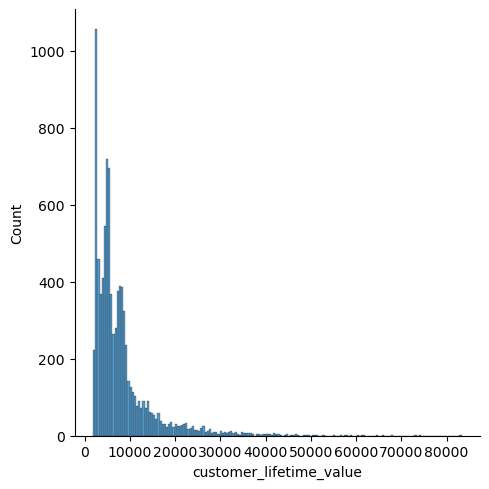

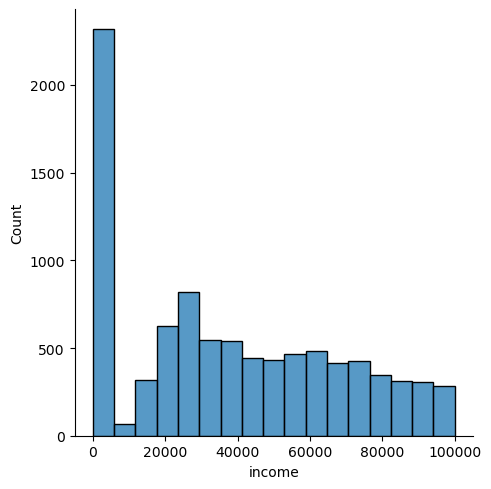

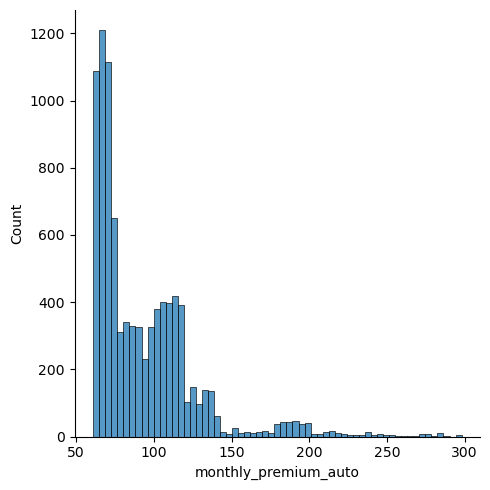

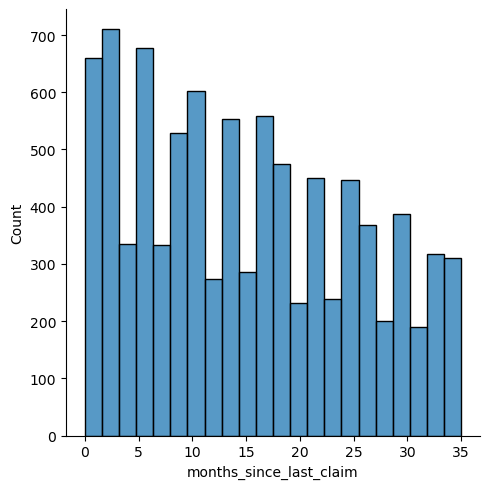

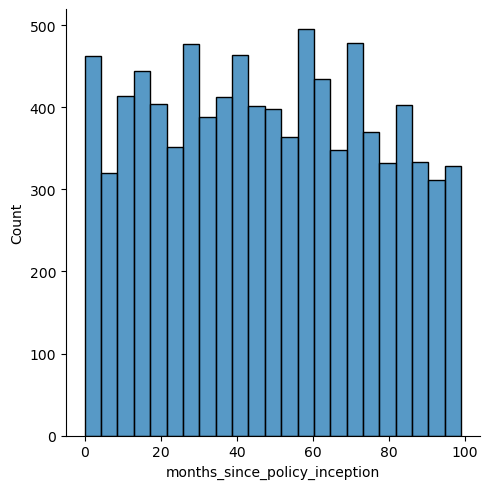

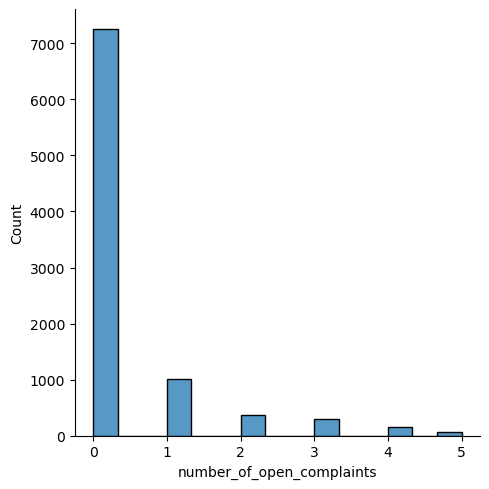

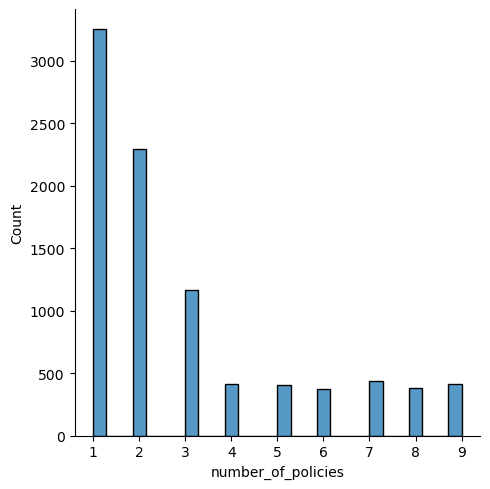

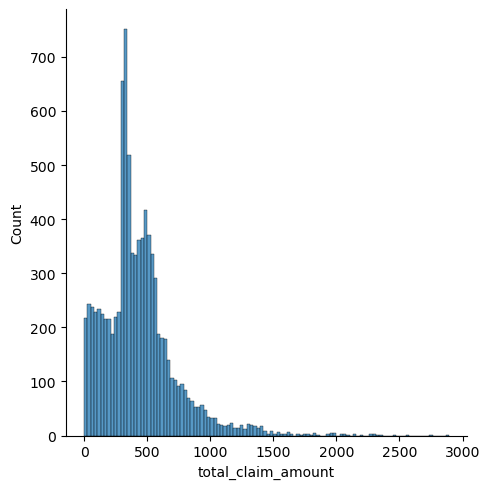

In [45]:
for column in data_num.columns:
    sns.displot(data[column])
    plt.show()
    

In [46]:
datacorr= round(data.corr(),2)
datacorr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


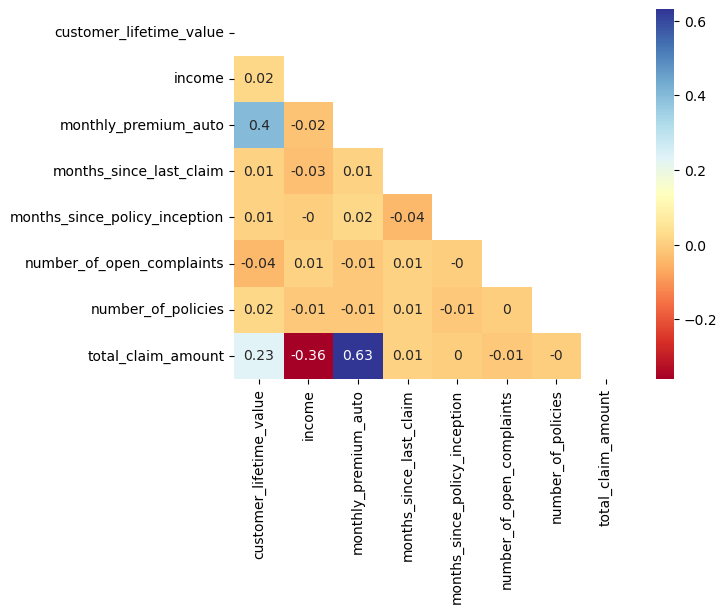

In [47]:
mask = np.zeros_like(datacorr, dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(datacorr, annot=True, mask=mask,cmap='RdYlBu')
plt.show()

In [48]:
sns.pairplot(data)

In [49]:
data.dtypes

customer                            object
state                               object
customer_lifetime_value            float64
response                            object
coverage                            object
education                           object
effective_to_date                period[M]
employmentstatus                    object
gender                              object
income                               int64
location_code                       object
marital_status                      object
monthly_premium_auto                 int64
months_since_last_claim              int64
months_since_policy_inception        int64
number_of_open_complaints            int64
number_of_policies                   int64
policy_type                         object
policy                              object
renew_offer_type                    object
sales_channel                       object
total_claim_amount                 float64
vehicle_class                       object
vehicle_siz

### Data Processing

### Numerical data is mostly skewed to the left, therefore a boxcox transformation would be appropriate in this case to normalize the data

In [50]:
data_trans = data.copy()

def boxcox_transform(data):
    numeric_cols = data_trans.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        
        data_trans[column] = np.where(data_trans[column]<=0, np.NAN, data_trans[column]) 
        data_trans[column] = data_trans[column].fillna(data_trans[column].mean())
        transformed_data, ci = stats.boxcox(data_trans[column])
        data_trans[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci
data, _ci = boxcox_transform(data_trans)
data= data_trans
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2.703839,No,Basic,Bachelor,2011-02,Employed,F,1247.937066,...,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize
1,QZ44356,Arizona,2.754926,No,Extended,Bachelor,2011-01,Unemployed,F,1167.961720,...,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize
2,AI49188,Nevada,2.780772,No,Premium,Bachelor,2011-02,Employed,F,1144.063081,...,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize
3,WW63253,California,2.759125,No,Basic,Bachelor,2011-01,Unemployed,M,1167.961720,...,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize
4,HB64268,Washington,2.704995,No,Basic,Bachelor,2011-02,Employed,M,1072.375744,...,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize


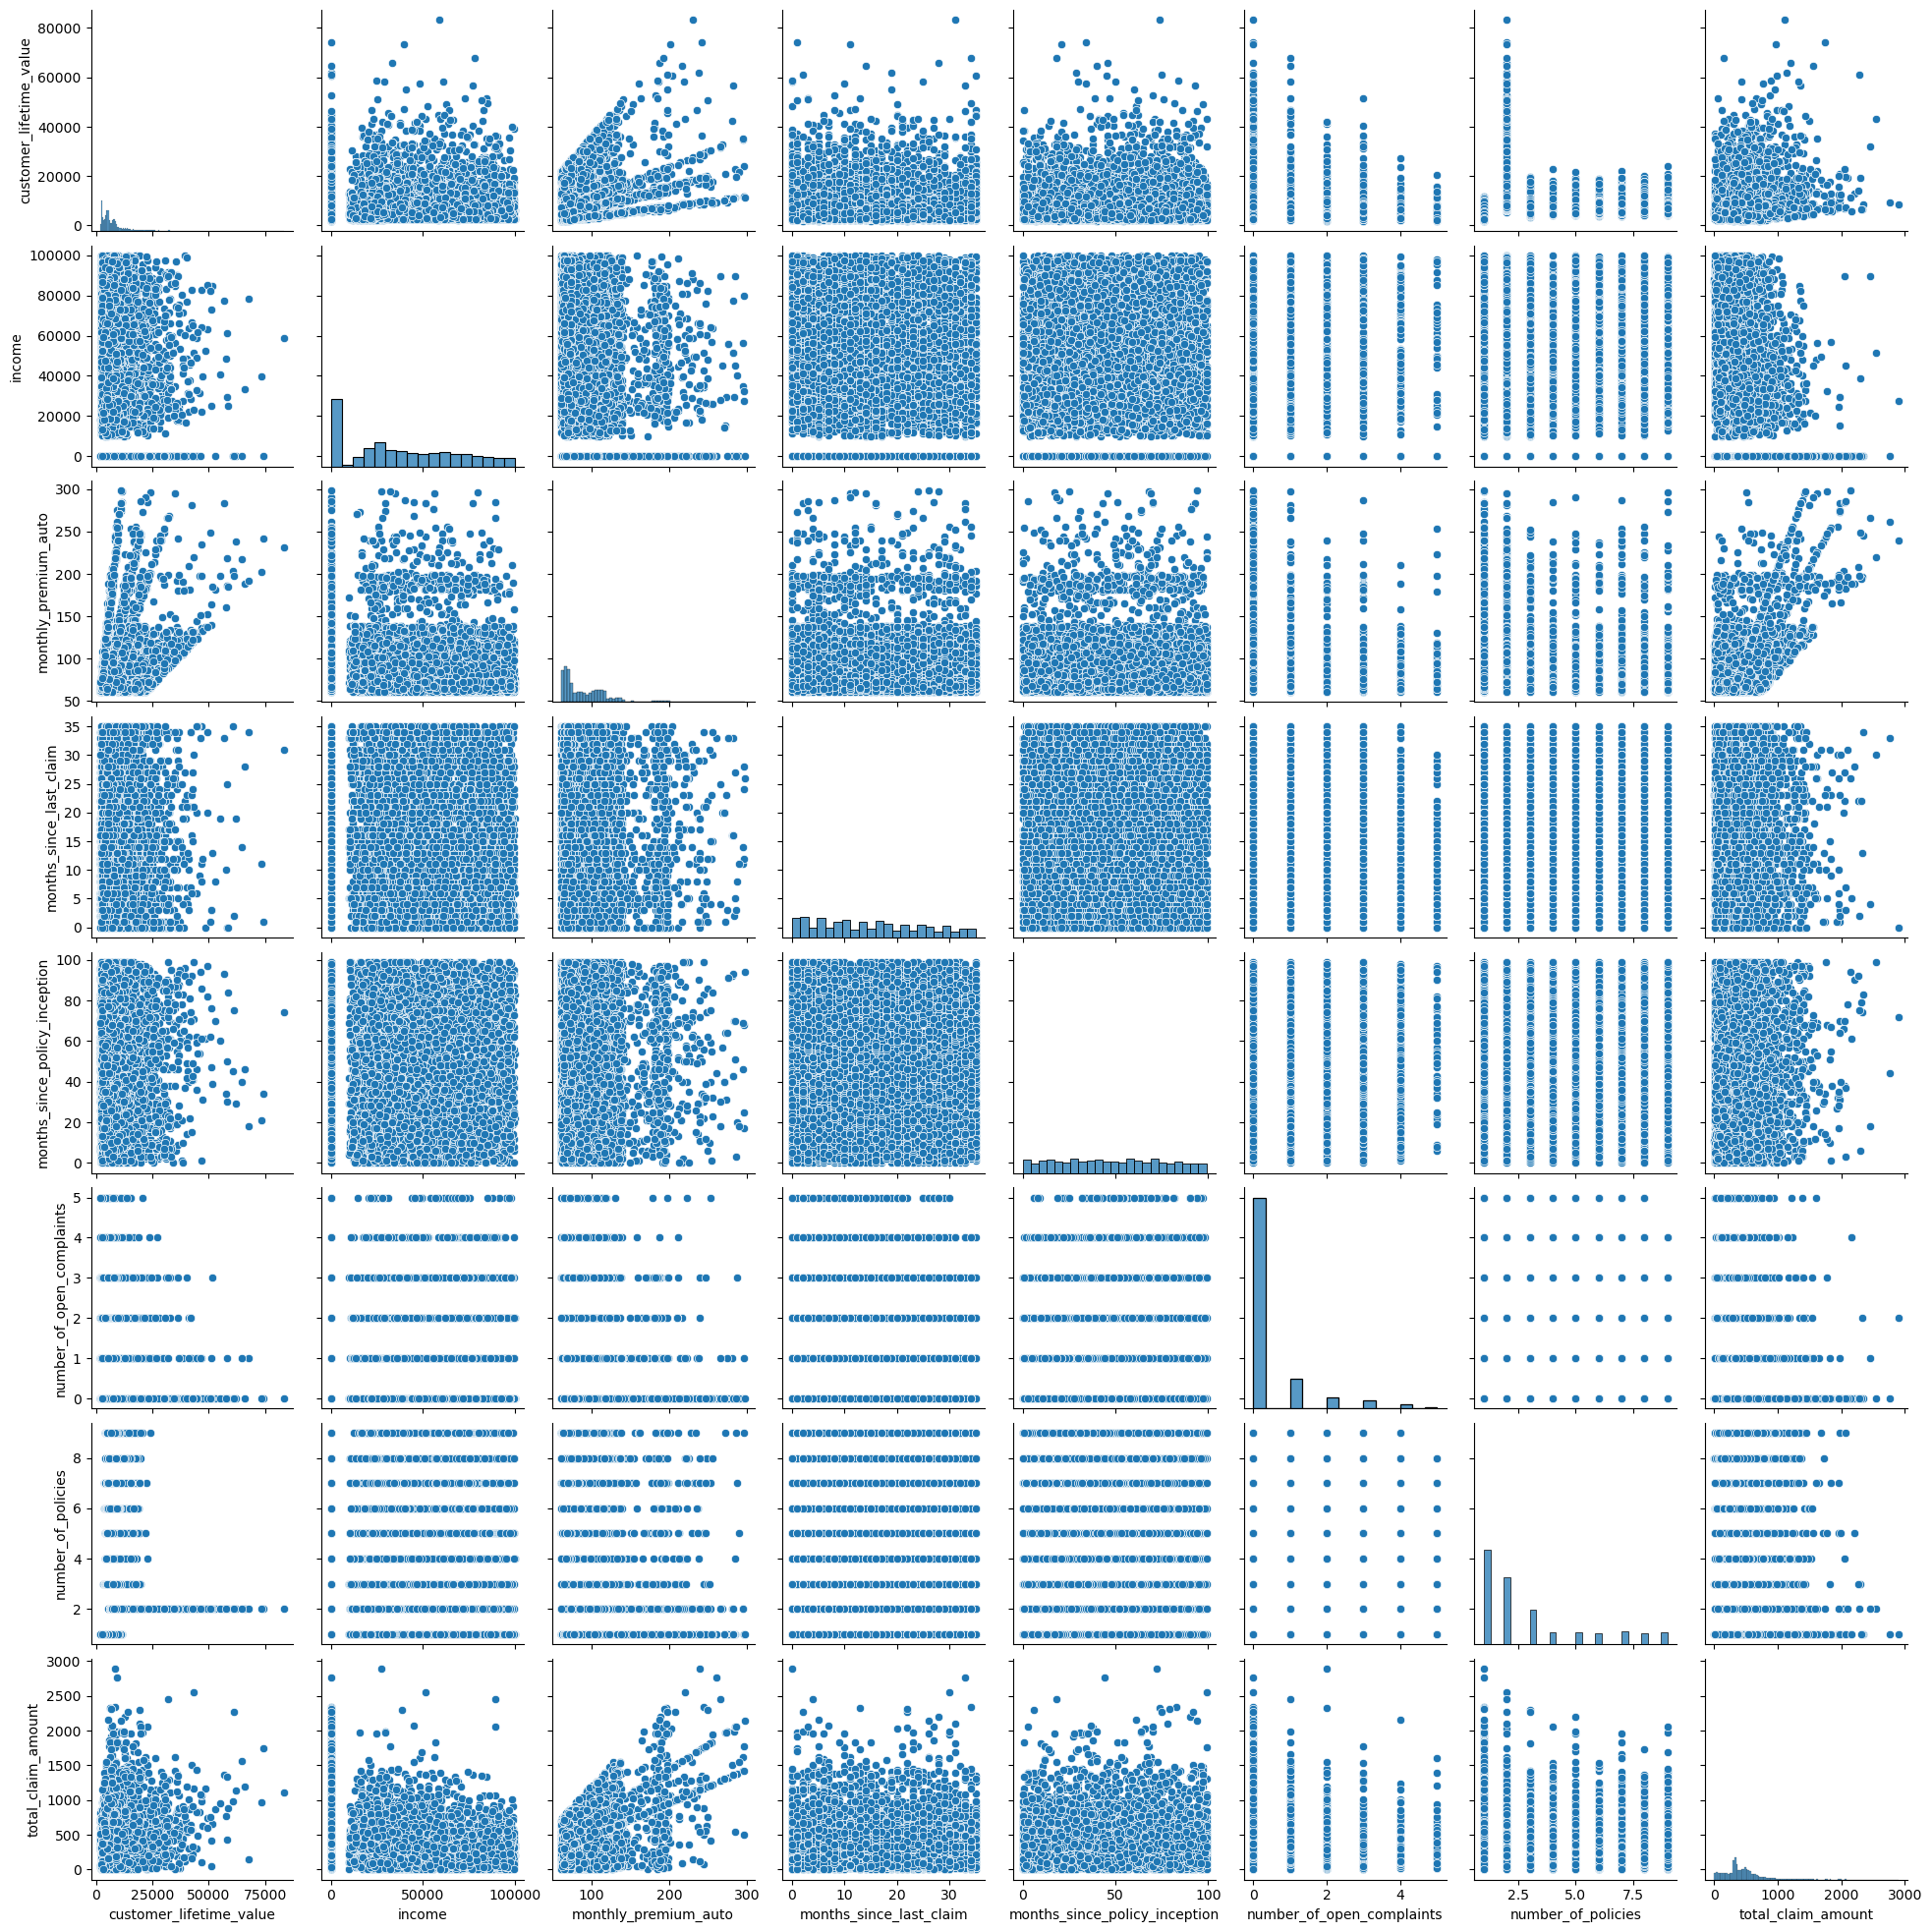

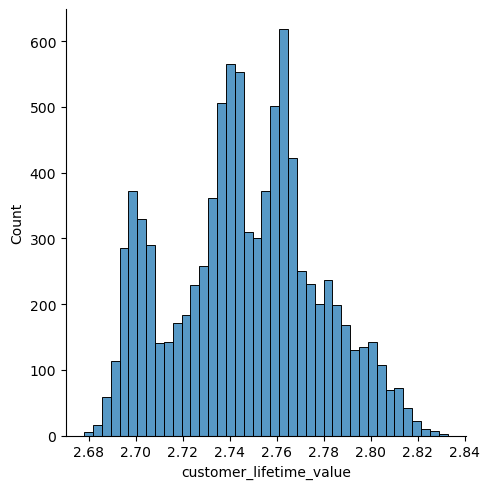

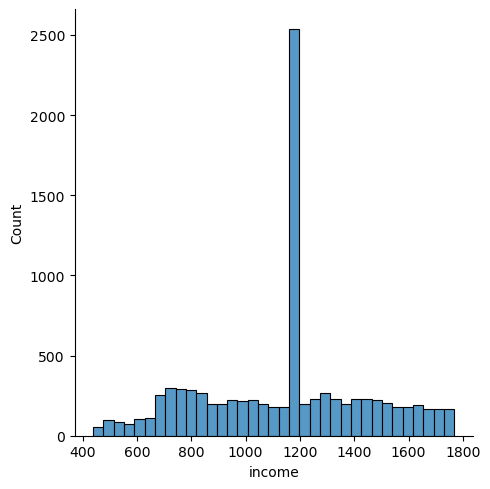

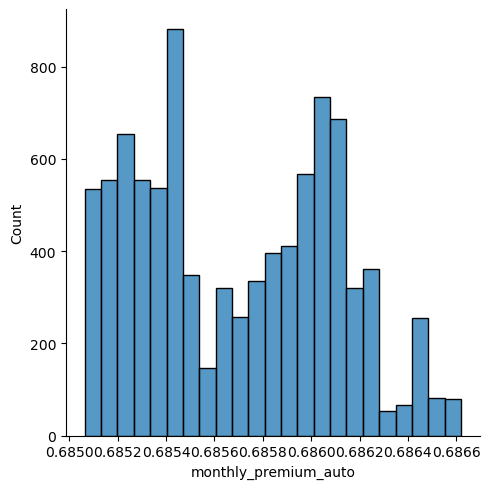

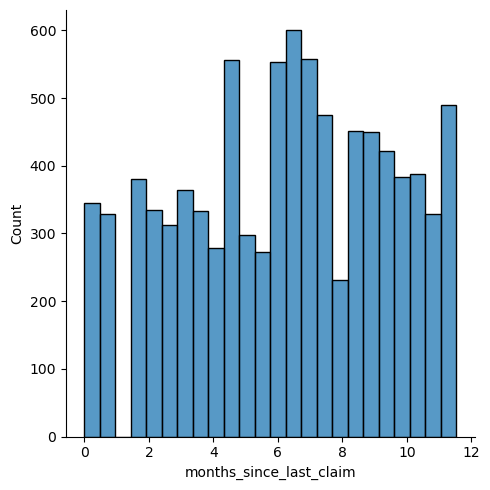

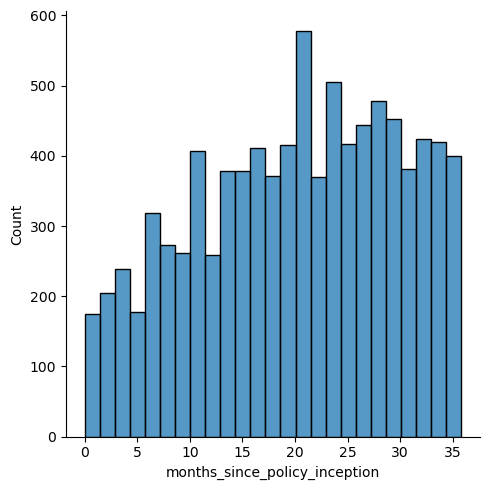

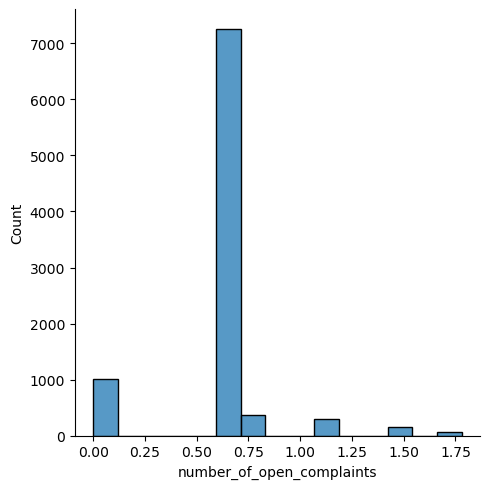

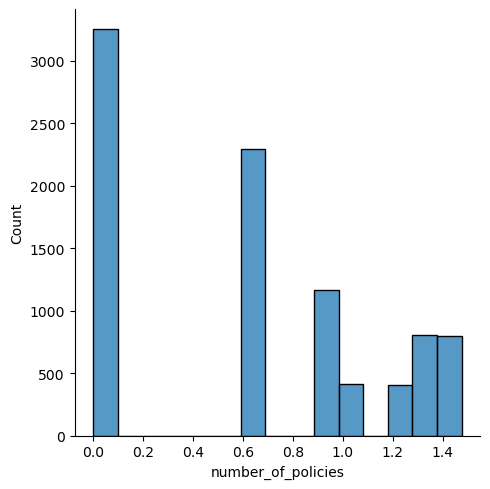

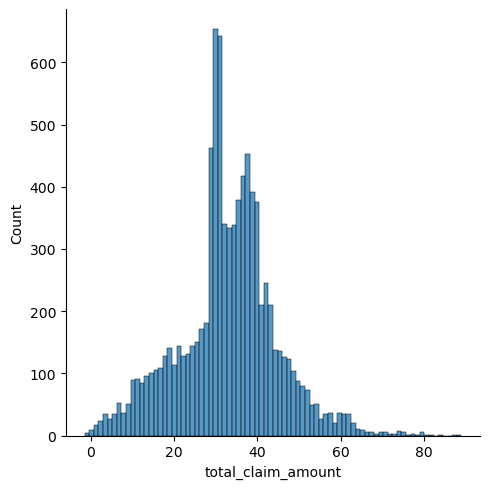

In [51]:
for column in data.select_dtypes(np.number).columns:
    sns.displot(data[column])
    plt.show()

In [52]:
data_obj = data.select_dtypes(include = 'object') 
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(data_obj)
encoded = encoder.transform(data_obj).toarray() 
cat_encoded = pd.DataFrame(encoded)
cat_encoded.columns = encoder.get_feature_names_out()

In [ ]:
### As per the distribution plots there are some outliers i.e (income) so let's remove them for a better representation

In [53]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=['total_claim_amount', 'customer']
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [54]:
data_num = data.select_dtypes(include = np.number)
X = pd.concat([data_num, cat_encoded], axis=1)
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_AA11235,customer_AA16582,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)
X = X.drop(['customer'],axis = 1)
X.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,2.703839,No,Basic,Bachelor,2011-02,Employed,F,1247.937066,Suburban,...,10.876059,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,2.754926,No,Extended,Bachelor,2011-01,Unemployed,F,1167.961720,Suburban,...,5.808248,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,2.780772,No,Premium,Bachelor,2011-02,Employed,F,1144.063081,Suburban,...,7.347815,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,2.759125,No,Basic,Bachelor,2011-01,Unemployed,M,1167.961720,Suburban,...,7.347815,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,2.704995,No,Basic,Bachelor,2011-02,Employed,M,1072.375744,Rural,...,5.471294,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [56]:
X= pd.concat([data_num, cat_encoded], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=45)

In [57]:
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_AA11235,customer_AA16582,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
y.head()

0    33.035752
1    56.357614
2    40.071789
3    38.763252
4    19.560154
Name: total_claim_amount, dtype: float64

In [59]:
len(X_train)

5480

In [60]:
len(y_test)

3654

In [61]:
len(X_test)

3654

In [62]:
len(y_train)

5480

In [63]:
### Modeling

In [64]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [65]:
predictions = model.predict(X_test)
predictions

array([31.73926728, 41.91288447, 27.21064848, ..., 27.52371145,
       34.2312362 , 31.0732477 ])

In [66]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.999998756348036
RMSE =  0.013285300822393568
The value of the metric MSE is  0.00017649921794149123
MAE =  0.01039917979786169


In [67]:
### BoxCox inversion

In [68]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci['total_claim_amount'])

In [69]:
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

RMSE =  491.82515332619005
The value of the metric MSE is  241891.98144433033
MAE =  402.21248009353997


In [70]:
### Differences between real and predicted values

In [71]:
results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
5004,355.200000,355.352920,0.152920
513,619.973889,620.145391,0.171502
1228,261.930545,262.117734,0.187189
3803,633.600000,633.884411,0.284411
6199,164.328953,164.498937,0.169984
...,...,...,...
2606,321.600000,321.839821,0.239821
1102,566.400000,566.407391,0.007391
3032,268.130863,268.082989,0.047874
4377,413.002348,413.074793,0.072445


In [72]:
results.sort_values('diff', ascending=False).head(50)

,true,pred,diff
6102,1191.319334,1189.852531,1.466803
8902,1212.054819,1210.619980,1.434839
8967,1004.755092,1003.333073,1.422019
5804,1158.793110,1157.403043,1.390067
4699,839.593218,838.232158,1.361060
1547,709.082334,707.785608,1.296726
8518,1008.035510,1006.760143,1.275367
1640,813.600000,812.326398,1.273602
6793,712.800000,711.551679,1.248321
9034,904.378268,903.180154,1.198114


### Graphical representation of results  (difference between prediced and actual values)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


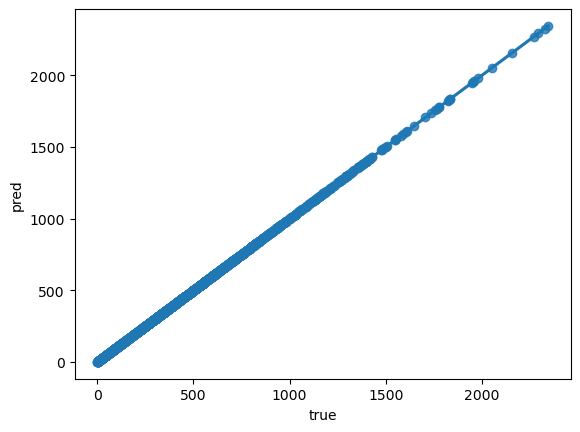

In [73]:
sns.regplot(results['true'], results['pred'])
plt.show()

####Dafuq?# Its still almost 1 :( There seem to be too many variables predicting just one (total_claim_amount), so I'll be redcucing the total number of features via feature selection.

Source: https://www.naukri.com/learning/articles/feature-selection-techniques-python-code/

In [ ]:
cor = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: colname = corr_matrix.columns[i]                  
col_corr.add(colname)
return col_corr     

In [ ]:
corr_features = correlation(X_train, 0.7)
Corr_features

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)
X_train     

In [ ]:
#it doesn't really run.....just keeps showing the * sigh)